# Premier entrainement sur les données FR et AR

### Importation des données

In [ ]:
import glob

list_train = glob.glob("/content/drive/MyDrive/MASTER_2_TAL-IM/CNN/corpus-traintest/train/*/*")
print(list_train)

list_test = glob.glob("/content/drive/MyDrive/MASTER_2_TAL-IM/CNN/corpus-traintest/test/*/*")
print(list_test)

In [7]:
import cv2
import numpy as np

dico = {'fr' : 0, 'ar' : 1} # il va permettre de faire la correspondance

# taille des images
img_rows = 28
img_cols = 28

In [ ]:
# Listes pour le train
x_train = [] # va contenir les images
y_train = [] # va contenir les labels

# boucle qui va permettre de parcourir toutes ces valeurs et récupérer à chaque fois l'image
# la lire, la remettre en format 28-28 et la classer en nasale ou non nasale
for path in list_train :
  x = cv2.imread(path,0).astype(np.uint8) # lire l'image en un format economique
  x = cv2.resize(x, (img_rows, img_cols)) # remettre à la bonne taille
  nasalite = path.split('/')[-2]  # récupérer le contenu 2 slash / avant la fin du chemin
  y = dico[nasalite]  # on forme le dico
  x_train.append(x)
  y_train.append(y)

print(len(x_train))

In [10]:
# Listes pour le test
x_test = [] # va contenir les images
y_test = [] # va contenir les labels

for path in list_test :
  x = cv2.imread(path,0).astype(np.uint8) # lire l'image en un format economique
  x = cv2.resize(x, (img_rows, img_cols)) # remettre à la bonne taille
  nasalite = path.split('/')[-2]  # récupérer le contenu 2 slash / avant la fin du chemin
  y = dico[nasalite]  # on forme le dico
  x_test.append(x)
  y_test.append(y)

print(len(x_test))

23


In [11]:
# Importations des librairies et modules
from __future__ import print_function
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta

In [12]:
# Définition des paramétres
batch_size = 12
num_classes = 2
epochs = 20

# Convertire en np.array
x_train_array = np.array(x_train)
x_test_array = np.array(x_test)

x_train_array_reshaped = x_train_array.reshape(-1, img_rows,img_cols,1) # -1 il va de lui même récupérer la valeur de x_train
x_test_array_reshaped = x_test_array.reshape(-1, img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

x_train_ok = x_train_array_reshaped.astype('float32') / 255
x_test_ok = x_test_array_reshaped.astype('float32') / 255

y_train_ok = to_categorical(y_train)
print(y_train_ok[0])

y_test_ok = to_categorical(y_test)
print(y_test_ok[0])

print(x_train_ok.ndim)
print(x_train_ok.shape)


[1. 0.]
[1. 0.]
4
(217, 28, 28, 1)


In [13]:
# Création du modéles du réseau neuronal
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Complilation des modéles pour permettre de lancer l'entrainement
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entraînement du modèle sur les données d'entraînement
model.fit(x_train_ok, y_train_ok,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_ok, y_test_ok))

# Evaluation du modèle sur les données de test
score = model.evaluate(x_test_ok, y_test_ok, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
19/19 [==============================] - 2s 51ms/step - loss: 0.7077 - accuracy: 0.5300 - val_loss: 0.6821 - val_accuracy: 0.7391
Epoch 2/20
19/19 [==============================] - 1s 40ms/step - loss: 0.6609 - accuracy: 0.6267 - val_loss: 0.7381 - val_accuracy: 0.5217
Epoch 3/20
19/19 [==============================] - 1s 42ms/step - loss: 0.6961 - accuracy: 0.6037 - val_loss: 0.6405 - val_accuracy: 0.6522
Epoch 4/20
19/19 [==============================] - 1s 44ms/step - loss: 0.5948 - accuracy: 0.6636 - val_loss: 0.5821 - val_accuracy: 0.6087
Epoch 5/20
19/19 [==============================] - 1s 59ms/step - loss: 0.5133 - accuracy: 0.7143 - val_loss: 0.5919 - val_accuracy: 0.6957
Epoch 6/20
19/19 [==============================] - 1s 68ms/step - loss: 0.4781 - accuracy: 0.7512 - val_loss: 0.4378 - val_accuracy: 0.7826
Epoch 7/20
19/19 [==============================] - 1s 64ms/step - loss: 0.3934 - accuracy: 0.8111 - val_loss: 0.4011 - val_accuracy: 0.7826
Epoch 8/20
19

## Enregistrer le meilleur model

In [17]:
# Enregistrer le meilleur modéle
# Importation des callbacks EarlyStopping et ModelCheckpoint depuis Keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Création de l'objet EarlyStopping pour arrêter l'entraînement tôt si la perte de validation ne s'améliore pas
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Création de l'objet ModelCheckpoint pour sauvegarder le meilleur modèle
# Le meilleur modèle est défini en fonction de la perte de validation ('val_loss')
mc = ModelCheckpoint(
    '/content/drive/MyDrive/MASTER_2_TAL-IM/CNN/Modeltest',
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Compilation du modèle avec la fonction de perte 'categorical_crossentropy',
# l'optimiseur 'sgd' (descente de gradient stochastique),
# et la métrique d'évaluation 'accuracy' (précision)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle avec les données d'entraînement
history = model.fit(x_train_ok, y_train_ok, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2, callbacks=[es, mc])

# Évaluation du modèle sur les données de test
score = model.evaluate(x_test_ok, y_test_ok, verbose=1)


Epoch 1/20
15/15 [==============================] - 3s 123ms/step - loss: 0.0748 - accuracy: 0.9711 - val_loss: 0.1450 - val_accuracy: 0.9773
Epoch 2/20
15/15 [==============================] - 2s 114ms/step - loss: 0.0677 - accuracy: 0.9653 - val_loss: 0.1135 - val_accuracy: 0.9773
Epoch 3/20
15/15 [==============================] - 1s 42ms/step - loss: 0.0533 - accuracy: 0.9711 - val_loss: 0.1619 - val_accuracy: 0.9545
Epoch 4/20
15/15 [==============================] - 1s 40ms/step - loss: 0.0490 - accuracy: 0.9595 - val_loss: 0.1991 - val_accuracy: 0.9091
Epoch 5/20
15/15 [==============================] - 1s 56ms/step - loss: 0.0541 - accuracy: 0.9711 - val_loss: 0.1892 - val_accuracy: 0.9318
Epoch 5: early stopping
1/1 [==============================] - 0s 44ms/step - loss: 0.1536 - accuracy: 0.9130


# Evaluation du model

In [18]:
from keras.models import load_model
import cv2
import numpy as np
import os

# Charger le meilleur modèle
best_model = load_model('/content/drive/MyDrive/MASTER_2_TAL-IM/CNN/Modeltest')

# Dossier contenant les images mélangées
folder_path = "/content/drive/MyDrive/MASTER_2_TAL-IM/CNN/corpus-melange"

# Liste pour stocker les résultats
predictions = []

# taille des images
img_rows = 28
img_cols = 28

# Parcourir toutes les images du dossier
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Assurez-vous que vous ne traitez que les fichiers JPEG (ajustez au besoin)
        # Charger et prétraiter l'image
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path, 0).astype(np.uint8)
        img = cv2.resize(img, (img_rows, img_cols))
        img_reshaped = img.reshape(1, img_rows, img_cols, 1)
        img_normalized = img_reshaped.astype('float32') / 255

        # Faire une prédiction avec le modèle
        prediction = best_model.predict(img_normalized)
        predicted_class = np.argmax(prediction)

        # Ajouter le résultat à la liste
        predictions.append((filename, predicted_class))

# Afficher les résultats
for result in predictions:
    print(f"Image : {result[0]}, Langue prédite : {'FR' if result[1] == 0 else 'AR'}")


1/1 [==============================] - 0s 20ms/step
Image : 19441287_extrait2_a.png, Langue prédite : AR
Image : 34930235_extrait6_u.png, Langue prédite : FR
Image : 19442524_extrait3_u.png, Langue prédite : AR
Image : 19441294_extrait3_u.png, Langue prédite : AR
Image : 34930213_extrait1_v.png, Langue prédite : FR
Image : 34930240_extrait12_i.png, Langue prédite : FR
Image : 34930225_extrait2_a.png, Langue prédite : FR
Image : 19441294_extrait9_i:.png, Langue prédite : AR
Image : 19441272_extrait3_a:.png, Langue prédite : AR
Image : 34930215_extrait2_a.png, Langue prédite : FR


## Matrice de confusion

1/1 [==============================] - 1s 737ms/step


<Axes: >

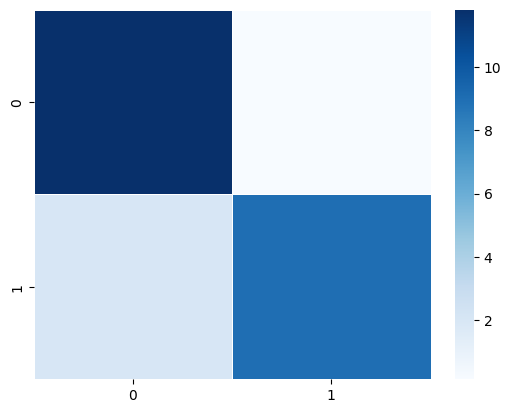

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# y_true : vraies classes, y_pred : classes prédites
y_true = np.argmax(y_test_ok, axis=1)
y_pred = np.argmax(model.predict(x_test_ok), axis=1)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_matrix, cmap='Blues', linewidth=0.5, robust=True)
